## conda install -c conda-forge opencv -y

In [8]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"Train images shape: {x_train.shape}")
print(f"Test images shape: {x_test.shape}")


Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


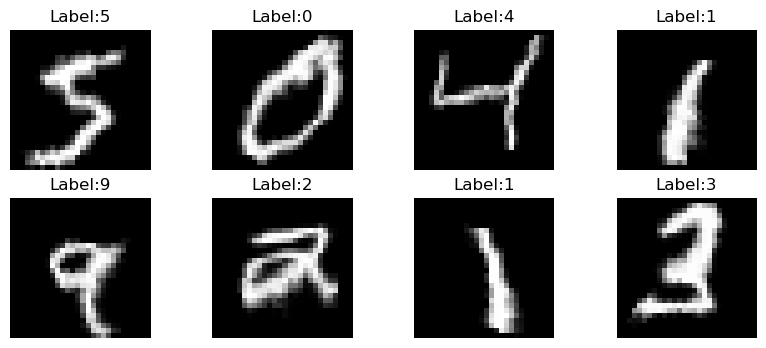

In [56]:
#Elastic Distortion Function
#aplha controls the strength of distortion
#sigma controls the smoothness of distortion
#shape stores the shape of the input image

def elastic_distort(image,alpha=36,sigma=6):
    random_state=np.random.RandomState(None)
    shape=image.shape
    dx=cv2.GaussianBlur((random_state.rand(*shape)*2-1),(17,17),sigma)*alpha
    dy=cv2.GaussianBlur((random_state.rand(*shape)*2-1),(17,17),sigma)*alpha
    x,y=np.meshgrid(np.arange(shape[1]),np.arange(shape[0]))
    map_x=(x+dx).astype(np.float32)
    map_y=(y+dy).astype(np.float32)
    distorted=cv2.remap(image,map_x,map_y,interpolation=cv2.INTER_LINEAR,borderMode=cv2.BORDER_REFLECT)
    return distorted

# Applies distortion on first 5000 images to save time

x_train_distorted=np.array([elastic_distort(img) for img in x_train[:5000]])
y_train_distorted=y_train[:5000]

# Normalizing and reshaping for CNN input
x_train_distorted=x_train_distorted[...,np.newaxis]/255.0
x_test=x_test[...,np.newaxis]/255.0

# One-hot encoding labels
y_train_distorted= to_categorical(y_train_distorted,10)
y_test_cat= to_categorical(y_test,10)

# Displaying some distorted samples
plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train_distorted[i].squeeze(),cmap='gray')
    plt.title(f"Label:{np.argmax(y_train_distorted[i])}")
    plt.axis('off')
plt.show()

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28, 1)


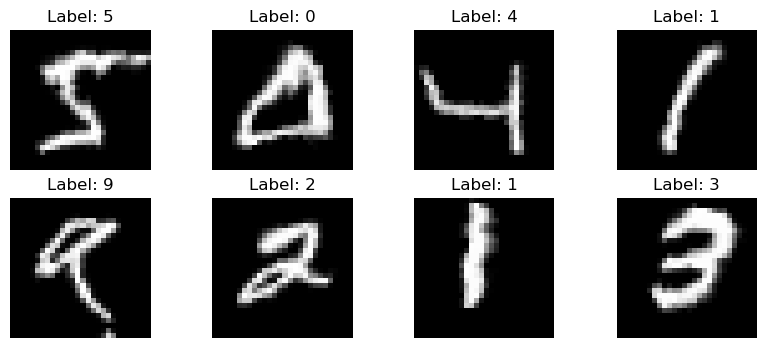

In [66]:
# Check input shapes before applying distortion
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

# Apply distortion only if input shape is correct
if x_train.shape[1:] == (28, 28):  # Ensure images are 28x28
    x_train_distorted = np.array([elastic_distort(img) for img in x_train[:5000]])
else:
    raise ValueError("Input images must have shape (28, 28)")

# Normalize and reshape
x_train_distorted = x_train_distorted[..., np.newaxis] / 255.0  # Add channel dimension and normalize
x_test = x_test[..., np.newaxis] / 255.0

# One-hot encode labels
y_train_distorted = to_categorical(y_train[:5000], 10)
y_test_cat = to_categorical(y_test, 10)

# Display distorted samples
plt.figure(figsize=(10, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(x_train_distorted[i].squeeze(), cmap='gray')  # Squeeze removes channel dimension
    plt.title(f"Label: {np.argmax(y_train_distorted[i])}")
    plt.axis('off')
plt.show()

In [72]:
print("y_train_distorted shape:", y_train_distorted.shape)
print("y_test shape:", y_test.shape)

y_train_distorted shape: (5000, 10)
y_test shape: (10000,)


In [74]:
from tensorflow.keras.utils import to_categorical

# Convert y_test to one-hot encoding
y_test_cat = to_categorical(y_test, 10)

# Verify the shapes
print("y_train_distorted shape:", y_train_distorted.shape)
print("y_test_cat shape after one-hot encoding:", y_test_cat.shape)

y_train_distorted shape: (5000, 10)
y_test_cat shape after one-hot encoding: (10000, 10)


In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model():
    # Initialize a Sequential model
    model = Sequential([
        # Define the input shape explicitly using Input layer
        Input(shape=(28, 28, 1)),  # Input layer specifies the shape of the data
        
        # First Convolutional Layer
        Conv2D(32, (3, 3), activation='relu'),
        
        # First MaxPooling Layer
        MaxPooling2D(2, 2),
        
        # Second Convolutional Layer
        Conv2D(64, (3, 3), activation='relu'),
        
        # Second MaxPooling Layer
        MaxPooling2D(2, 2),
        
        # Flatten Layer
        Flatten(),
        
        # Fully Connected (Dense) Layer
        Dense(128, activation='relu'),
        
        # Dropout Layer
        Dropout(0.3),
        
        # Output Layer
        Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Build two identical models
model1 = build_model()
model2 = build_model()

# Print the summary of the first model
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
#Training Multiple CNN Models for Ensemble
history1=model1.fit(x_train_distorted,y_train_distorted,epochs=5,validation_data=(x_test,y_test_cat))
history2=model2.fit(x_train_distorted,y_train_distorted,epochs=5,validation_data=(x_test,y_test_cat))

#Saving the Models
model1.save("model1.keras")
model2.save("model2.keras")

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9466 - loss: 0.1774 - val_accuracy: 0.1135 - val_loss: 2.3175
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9484 - loss: 0.1585 - val_accuracy: 0.1135 - val_loss: 2.3166
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9554 - loss: 0.1389 - val_accuracy: 0.1135 - val_loss: 2.3086
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9638 - loss: 0.1084 - val_accuracy: 0.1135 - val_loss: 2.3080
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9669 - loss: 0.0966 - val_accuracy: 0.1135 - val_loss: 2.3058
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9261 - loss: 0.2300 - val_accuracy: 0.1135 - val_loss: 2.3047
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9365 - loss: 0.1882 - val_accuracy: 0.0958 - val_loss: 2.3096
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9486 - loss: 0.1628 - val_accuracy: 0.0958 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


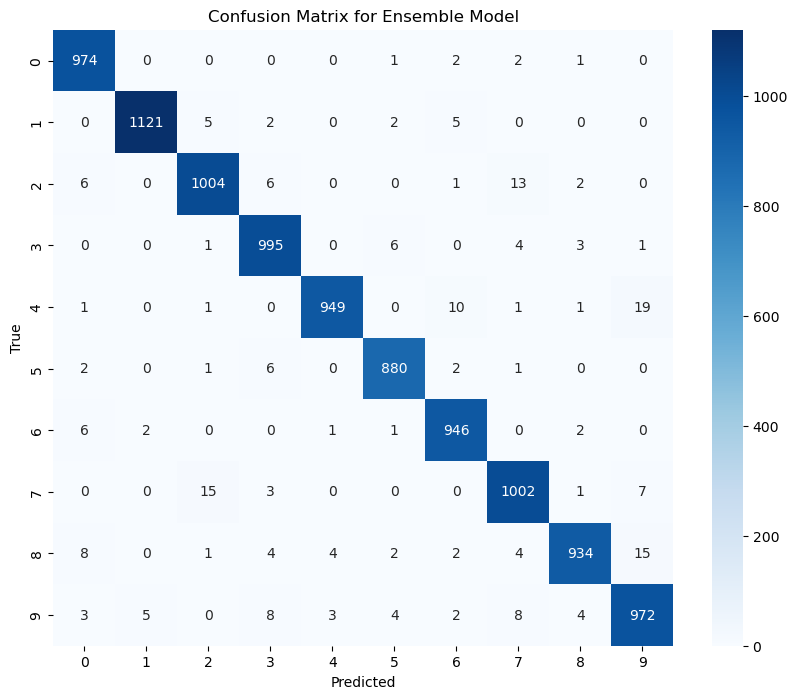

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.99      0.96      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [90]:
#Ensembling Predictions & Evaluation
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix,classification_report

model1=load_model("model1.keras")
model2=load_model("model2.keras")

def predict_ensemble(x):
    pred1=model1.predict(x)
    pred2=model2.predict(x)
    avg_pred=(pred1+pred2)/2
    return avg_pred

#Predict on test set
y_pred_probs=predict_ensemble(x_test)
y_pred=np.argmax(y_pred_probs,axis=1)
y_true=y_test

cm=confusion_matrix(y_true,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Classification report
print(classification_report(y_true, y_pred,zero_division=0))